In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date

In [3]:
today = date.today()
print("Today's date:", today)
date_today = str(today)
date_today

Today's date: 2022-10-05


'2022-10-05'

In [4]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(n M)$'
DCX = 'DCX'
Type = 'DCX Type'

taxol = '[Taxol] ' r'$(\mu M)$'

Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'

In [5]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
darkyellow= '#FCF2B8'
yellow = '#FFCB05'
lightyellow = '#FCF2B8'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))


palette = [grey,cyan] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green]
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]

StartHue3 = Color(lightyellow)
Yellowcolor = list(StartHue3.range_to(Color(darkyellow),5))
Yellowpalette = list(map(Color.get_hex,Yellowcolor))
Yellowpalette

['#fcf2b8', '#fcf2b8', '#fcf2b8', '#fcf2b8', '#fcf2b8']

## Import Kappa csv ##

In [6]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [7]:
folders = [x for x in path.iterdir() if x.is_dir()]
folders = [i for i in folders if (str(i)[-4:] == 'pact') == True]
folders

[WindowsPath('D:/Sofia/2022_2summer-fall/2022-10-04-compact-R89G/CH1_DCX125nM_typeR89G_taxol10uM_compact'),
 WindowsPath('D:/Sofia/2022_2summer-fall/2022-10-04-compact-R89G/CH2_DCX125nM_typeR89G_taxol10uM_compact'),
 WindowsPath('D:/Sofia/2022_2summer-fall/2022-10-04-compact-R89G/CH3_DCX125nM_typeR89G_taxol10uM_compact'),
 WindowsPath('D:/Sofia/2022_2summer-fall/2022-10-04-compact-R89G/CH4_DCX125nM_typeR89G_taxol10uM_compact')]

In [8]:
files = []
for k in folders:
    files0 = [x for x in k.iterdir() if x.is_file()]
    files0 = [i for i in files0 if str(i).rfind('final') != -1 if str(i).rfind('csv') != -1]
    files = files + files0
files

[WindowsPath('D:/Sofia/2022_2summer-fall/2022-10-04-compact-R89G/CH1_DCX125nM_typeR89G_taxol10uM_compact/1-plain-Stack_Composite-final.csv'),
 WindowsPath('D:/Sofia/2022_2summer-fall/2022-10-04-compact-R89G/CH1_DCX125nM_typeR89G_taxol10uM_compact/2-taxol-Stack_Composite-final.csv'),
 WindowsPath('D:/Sofia/2022_2summer-fall/2022-10-04-compact-R89G/CH1_DCX125nM_typeR89G_taxol10uM_compact/3-taxdcxr89g-Stack_Composite-final.csv'),
 WindowsPath('D:/Sofia/2022_2summer-fall/2022-10-04-compact-R89G/CH3_DCX125nM_typeR89G_taxol10uM_compact/1-plain-Stack_Composite-final.csv'),
 WindowsPath('D:/Sofia/2022_2summer-fall/2022-10-04-compact-R89G/CH3_DCX125nM_typeR89G_taxol10uM_compact/2-tax-Stack_Composite-final.csv'),
 WindowsPath('D:/Sofia/2022_2summer-fall/2022-10-04-compact-R89G/CH3_DCX125nM_typeR89G_taxol10uM_compact/3-taxdcxr89g-Stack_Composite-final.csv'),
 WindowsPath('D:/Sofia/2022_2summer-fall/2022-10-04-compact-R89G/CH4_DCX125nM_typeR89G_taxol10uM_compact/1-plain-Stack_Composite-final.csv')

In [9]:
files1 = [i for i in files if str(i).rfind('1-plain') != -1 ]
files2 = [i for i in files if str(i).rfind('2-tax') != -1 ]
files3 = [i for i in files if str(i).rfind('3-taxdcx') != -1 ]
files1

[WindowsPath('D:/Sofia/2022_2summer-fall/2022-10-04-compact-R89G/CH1_DCX125nM_typeR89G_taxol10uM_compact/1-plain-Stack_Composite-final.csv'),
 WindowsPath('D:/Sofia/2022_2summer-fall/2022-10-04-compact-R89G/CH3_DCX125nM_typeR89G_taxol10uM_compact/1-plain-Stack_Composite-final.csv'),
 WindowsPath('D:/Sofia/2022_2summer-fall/2022-10-04-compact-R89G/CH4_DCX125nM_typeR89G_taxol10uM_compact/1-plain-Stack_Composite-final.csv')]

In [10]:
def findmetadata(tag,end,i):
    n = len(tag)
    locstart = str(i).find(tag) 
    locend = str(i).find(end, locstart)
    tag0 = str(i)[locstart+n: locend]
    
    return tag0

In [11]:
dates= []
CH= []
tax= []
dcx = []
dcxtype= []
for i in files1:
    dateloc = str(i).rfind("202")   
    dates0 = str(i)[dateloc : dateloc+10]
    dates = dates + [dates0]

    CH0 = findmetadata("CH",'_',i)
    CH = CH + [CH0]  
    
    dcx0 = findmetadata("DCX",'nM',i)
    dcx = dcx + [dcx0] 
    
    type0 = findmetadata("type",'_',i)
    dcxtype = dcxtype + [type0] 
    
    tax0 = findmetadata("taxol",'uM',i)
    tax = tax + [tax0] 
    

dates,CH,dcx, dcxtype,tax

(['2022-10-04', '2022-10-04', '2022-10-04'],
 ['1', '3', '4'],
 ['125', '125', '125'],
 ['R89G', 'R89G', 'R89G'],
 ['10', '10', '10'])

In [147]:
def keep_avg_kappa(data,timepoint):
    keep_columns = ['Curve Name','Curve Length (um)']
    
    data_avg = data.drop_duplicates(subset ='Curve Length (um)', keep = 'first')
    data_avg = data_avg[keep_columns]
    
    if timepoint == 'plain':
        data_avg[taxol]=0
        data_avg[DCXconc]=0
        
    if timepoint == 'tax':
        data_avg[taxol]=float(tax)
        data_avg[DCXconc]=0
        
    if timepoint == 'dcx':
        data_avg[taxol]=float(tax)
        data_avg[DCXconc]=float(DCXc)
                
    data_avg[Type]=DCXt    
    data_avg['Date']=dates
    data_avg['CH']=CH
    
    return data_avg

In [148]:
data_1plain_avg = keep_avg_kappa(data_1plain,'plain')
data_2tax_avg = keep_avg_kappa(data_2tax,'tax')
data_3dcx_avg = keep_avg_kappa(data_3dcx,'dcx')

data = pd.concat([data_1plain_avg, data_2tax_avg, data_3dcx_avg], ignore_index=True)

data = data.sort_values(['Curve Name',taxol,DCXconc])

In [149]:
data

,Curve Name,Curve Length (um),[Taxol] $(\mu M)$,[DCX] $(n M)$,DCX Type,Date,CH
0,CURVE 1,16.939511,0.0,0.0,WT,2022-09-19,1
9,CURVE 1,17.233048,10.0,0.0,WT,2022-09-19,1
18,CURVE 1,16.926787,10.0,125.0,WT,2022-09-19,1
1,CURVE 2,15.436906,0.0,0.0,WT,2022-09-19,1
10,CURVE 2,15.736610,10.0,0.0,WT,2022-09-19,1
19,CURVE 2,15.425877,10.0,125.0,WT,2022-09-19,1
2,CURVE 3,10.327843,0.0,0.0,WT,2022-09-19,1
11,CURVE 3,10.606326,10.0,0.0,WT,2022-09-19,1
20,CURVE 3,10.327453,10.0,125.0,WT,2022-09-19,1
3,CURVE 4,14.318897,0.0,0.0,WT,2022-09-19,1


In [107]:
path.parents[1]

WindowsPath('D:/Sofia/2022_2summer-fall')

In [150]:
newdirectory = str(path.parents[1])+'//Compaction_Data_Sheets'
newmydir = Path(newdirectory)
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('D:/Sofia/2022_2summer-fall/Compaction_Data_Sheets')

In [151]:
data.to_csv(path/(dates+'_'+CH+'_compaction_analysed-on_'+date_today +'.csv'), encoding='utf-8', index=False)
data.to_csv(newmydir/(dates+'_'+CH+'_compaction_analysed-on_'+date_today+'.csv'), encoding='utf-8', index=False)

### JOIN ###

In [152]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [153]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-9:] != 'Sheet.csv') == True]
files = [i for i in files if (str(i)[-3:] == 'csv') == True]
files

[WindowsPath('D:/Sofia/2022_2summer-fall/Compaction_Data_Sheets/2022-09-06_2_compaction_analysed-on_2022-09-19.csv'),
 WindowsPath('D:/Sofia/2022_2summer-fall/Compaction_Data_Sheets/2022-09-19_1_compaction_analysed-on_2022-09-19.csv'),
 WindowsPath('D:/Sofia/2022_2summer-fall/Compaction_Data_Sheets/2022-09-19_2_compaction_analysed-on_2022-09-19.csv')]

In [154]:
joindata = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    joindata = joindata.append(d, ignore_index=True)

joindata.to_csv(path/('jointdata-on_'+date_today +'_MasterSheet.csv'), encoding='utf-8', index=False)
joindata

,Curve Name,Curve Length (um),[Taxol] $(\mu M)$,[DCX] $(n M)$,DCX Type,Date,CH
0,CURVE 1,8.274138,0.0,0.0,WT,2022-09-06,2
1,CURVE 1,8.496732,10.0,0.0,WT,2022-09-06,2
2,CURVE 1,8.296878,10.0,125.0,WT,2022-09-06,2
3,CURVE 1,16.939511,0.0,0.0,WT,2022-09-19,1
4,CURVE 1,17.233048,10.0,0.0,WT,2022-09-19,1
5,CURVE 1,16.926787,10.0,125.0,WT,2022-09-19,1
6,CURVE 2,15.436906,0.0,0.0,WT,2022-09-19,1
7,CURVE 2,15.736610,10.0,0.0,WT,2022-09-19,1
8,CURVE 2,15.425877,10.0,125.0,WT,2022-09-19,1
9,CURVE 3,10.327843,0.0,0.0,WT,2022-09-19,1


In [155]:
plainData = joindata.iloc[:-2:3]
taxData = joindata.iloc[1:-1:3]
dcxData = joindata.iloc[2::3]


In [156]:
def percent_expansion(beforeData, afterData):
    ratio = beforeData['Curve Length (um)'].values / afterData['Curve Length (um)'].values
    prcnt_expansion = (1- ratio)*100
    afterData['Expansion %'] = prcnt_expansion
    return afterData

In [157]:
percent_expansion(plainData, taxData)
percent_expansion(plainData, dcxData)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Curve Name,Curve Length (um),[Taxol] $(\mu M)$,[DCX] $(n M)$,DCX Type,Date,CH,Expansion %
2,CURVE 1,8.296878,10.0,125.0,WT,2022-09-06,2,0.274077
5,CURVE 1,16.926787,10.0,125.0,WT,2022-09-19,1,-0.075171
8,CURVE 2,15.425877,10.0,125.0,WT,2022-09-19,1,-0.071497
11,CURVE 3,10.327453,10.0,125.0,WT,2022-09-19,1,-0.003771
14,CURVE 4,14.326745,10.0,125.0,WT,2022-09-19,1,0.054781
17,CURVE 5,12.175028,10.0,125.0,WT,2022-09-19,1,0.127784
20,CURVE 6,9.605108,10.0,125.0,WT,2022-09-19,1,1.306519
23,CURVE 7,14.360536,10.0,125.0,WT,2022-09-19,1,0.137073
26,CURVE 8,16.281768,10.0,125.0,WT,2022-09-19,1,0.335296
29,CURVE 9,8.525752,10.0,125.0,WT,2022-09-19,1,0.054493


In [158]:
finalData = taxData.append(dcxData, ignore_index=True)
finalData

,Curve Name,Curve Length (um),[Taxol] $(\mu M)$,[DCX] $(n M)$,DCX Type,Date,CH,Expansion %
0,CURVE 1,8.496732,10.0,0.0,WT,2022-09-06,2,2.619755
1,CURVE 1,17.233048,10.0,0.0,WT,2022-09-19,1,1.703338
2,CURVE 2,15.736610,10.0,0.0,WT,2022-09-19,1,1.904500
3,CURVE 3,10.606326,10.0,0.0,WT,2022-09-19,1,2.625633
4,CURVE 4,14.679311,10.0,0.0,WT,2022-09-19,1,2.455253
5,CURVE 5,12.426773,10.0,0.0,WT,2022-09-19,1,2.151020
6,CURVE 6,9.729270,10.0,0.0,WT,2022-09-19,1,2.566011
7,CURVE 7,14.631739,10.0,0.0,WT,2022-09-19,1,1.988052
8,CURVE 8,16.643027,10.0,0.0,WT,2022-09-19,1,2.498650
9,CURVE 9,8.646513,10.0,0.0,WT,2022-09-19,1,1.450379


In [159]:
finalData.to_csv(path/('expansion_plain_to_tax_dcx_data-analyzed_'+date_today +'_MasterSheet.csv'), encoding='utf-8', index=False)

In [118]:
nogales2018 = (1- 81.76/83.95)*100
nogales2018

2.608695652173909

In [119]:
nogales2017 = (1- 81.5/83.2)*100
nogales2017


2.043269230769229

In [120]:
TAXnogales2017preformed = (1- 81.5/81.8)*100
TAXnogales2017copoly = (1- 81.5/82.3)*100
TAXnogales2017preformed , TAXnogales2017copoly


(0.3667481662591676, 0.9720534629404587)

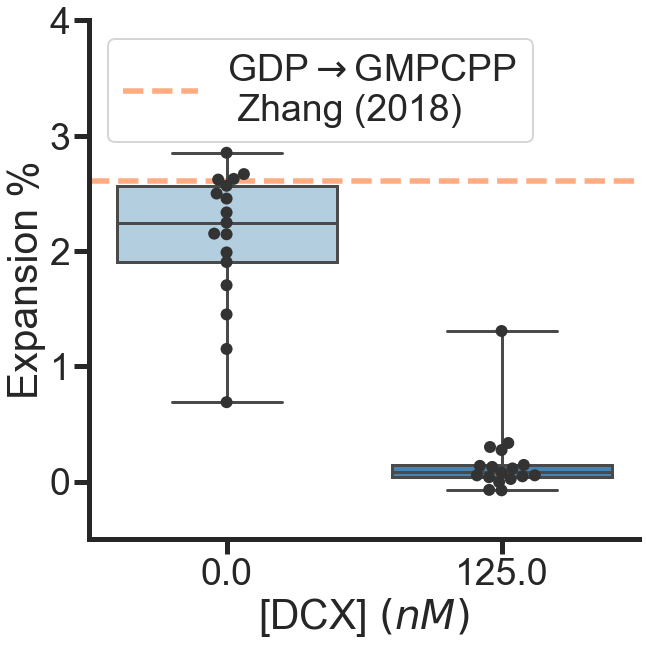

In [161]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

#rect = 0,0,1,1 # create an rectangle for the new axis
#log_ax = fig.add_axes(rect) # create a new axis (or use an existing one)
#log_ax.set_xscale("log") # log first

ax = sns.boxplot(x=DCXconc, y='Expansion %', data=finalData, whis=np.inf, palette='Blues',linewidth=3)
ax = sns.swarmplot(x=DCXconc, y='Expansion %', data=finalData, color=".2", size=12)

ax.axhline(y = nogales2018, color = lightorange ,linestyle="--", linewidth=5.5, label='GDP'r'$\rightarrow$''GMPCPP \n Zhang (2018)')
#plt.xlim(0.1,10)

ax.set_ylim(-0.5,4)
ax.legend( loc = 'upper left')
#ax.legend('')
ax.set_xlabel(DCXconc)

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()


plt.savefig(path/('compaction_'+date_today+'.svg'))

In [122]:
(1- 81.76/83.95)*100

2.608695652173909

In [51]:
joindata

,Curve Name,Curve Length (um),[Taxol] $(\mu M)$,Date,CH
0,CURVE 1,20.464017,0.0,2022-05-03,CH2
1,CURVE 1,20.995385,10.0,2022-05-03,CH2
2,CURVE 10,19.873343,0.0,2022-05-03,CH2
3,CURVE 10,20.522329,10.0,2022-05-03,CH2
4,CURVE 2,14.120813,0.0,2022-05-03,CH2
...,...,...,...,...,...
125,CURVE 2,23.829905,0.3,2022-05-25,CH4
126,CURVE 1,14.716855,0.0,2022-05-25,CH5
127,CURVE 1,15.023748,1.0,2022-05-25,CH5
128,CURVE 2,22.356874,0.0,2022-05-25,CH5


In [52]:
joindata.groupby(taxol).size()

[Taxol] $(\mu M)$
0.0     88
0.1     12
0.3     11
1.0      9
10.0    10
dtype: int64

In [54]:
(88-12-11-9-10)/2

23.0

In [1]:
notax = 8.3301
tax = 8.5893
taxdcx = 8.3690

In [3]:
def simple_expansion(before,after):
    return (1- before/after)*100

In [4]:
simple_expansion(notax,tax)

3.0177080786560007

In [5]:
simple_expansion(notax,taxdcx)

0.4648106105866856